# Merging Tables With Different Join Types
**Take your knowledge of joins to the next level. In this chapter, you’ll work with TMDb movie data as you learn about left, right, and outer joins. You’ll also discover how to merge a table to itself and merge on a DataFrame index.**

In [70]:
import pandas as pd
import numpy as np

## Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the `movies` table and the `financials` table.

In [2]:
movies = pd.read_pickle('movies.p')
financials = pd.read_pickle('financials.p')

In [3]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [4]:
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


- Merge the `movies` table, as the left table, with the `financials` table using a left join, and save the result to `movies_financials`.
- Count the number of rows in `movies_financials` with a null value in the `budget` column.

In [5]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


In [6]:
movies_financials.sort_values('budget', ascending=False).head(10)

,id,title,popularity,release_date,budget,revenue
4020,1865,Pirates of the Caribbean: On Stranger Tides,135.413856,2011-05-14,380000000.0,1.045714e+09
3759,285,Pirates of the Caribbean: At World's End,139.082615,2007-05-19,300000000.0,9.610000e+08
2424,99861,Avengers: Age of Ultron,134.279229,2015-04-22,280000000.0,1.405404e+09
658,1452,Superman Returns,57.925623,2006-06-28,270000000.0,3.910812e+08
3847,38757,Tangled,48.681969,2010-11-24,260000000.0,5.917949e+08
5,49529,John Carter,43.926995,2012-03-07,260000000.0,2.841391e+08
636,559,Spider-Man 3,115.699814,2007-05-01,258000000.0,8.908716e+08
597,57201,The Lone Ranger,49.046956,2013-07-03,255000000.0,8.928991e+07
1501,127585,X-Men: Days of Future Past,118.078691,2014-05-15,250000000.0,7.478628e+08
809,57158,The Hobbit: The Desolation of Smaug,94.370564,2013-12-11,250000000.0,9.584000e+08


In [7]:
movies_financials.sort_values('popularity', ascending=False).head(10)

,id,title,popularity,release_date,budget,revenue
4546,211672,Minions,875.581305,2015-06-17,74000000.0,1.156731e+09
4343,157336,Interstellar,724.247784,2014-11-05,165000000.0,6.751200e+08
1966,293660,Deadpool,514.569956,2016-02-09,58000000.0,7.831130e+08
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30,170000000.0,7.733286e+08
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13,150000000.0,3.788583e+08
1867,135397,Jurassic World,418.708552,2015-06-09,150000000.0,1.513529e+09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09,140000000.0,6.550112e+08
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26,170000000.0,7.106446e+08
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18,125000000.0,7.521002e+08
2614,177572,Big Hero 6,203.734590,2014-10-24,165000000.0,6.521054e+08


## Enriching a dataset
Setting `how='left'` with the `.merge()method` is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

The `toy_story` DataFrame contains the *Toy Story* movies. 

- Merge `toy_story` and `taglines` on the `id` column with a **left join**, and save the result as `toystory_tag_l`.

- With `toy_story` as the left table, merge to it `taglines` on the `id` column with an **inner join**, and save as `toystory_tag`.



In [8]:
toy_story = movies[movies['title'].str.contains('Toy Story')]
toy_story

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [9]:
taglines = pd.read_pickle('taglines.p')
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [10]:
# Merge the toy_story and taglines tables with a left join
toystory_tag_l = toy_story.merge(taglines, on='id', how='left')

toystory_tag_l

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN


In [11]:
# Print shape of toystory_tag_l
print(toystory_tag_l.shape)

(3, 5)


In [12]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id')

toystory_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!


In [13]:
# Print shape of toystory_tag
print(toystory_tag.shape)

(2, 5)


## Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called `scifi_movies` and another table of action movies called `action_movies`. Your goal is to find which movies are considered only science fiction `movies`. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [14]:
action_movies = pd.read_pickle('action_movies.p')
scifi_movies = pd.read_pickle('scifi_movies.p')

- Merge `action_movies` and `scifi_movies` tables with a right join on `movie_id`. Save the result as `action_scifi`.
- Update the merge to add suffixes, where `'_act'` and `'_sci'` are suffixes for the left and right tables, respectively.
- From `action_scifi`, subset only the rows where the `genre_act` column is null.
- Merge `movies` and `scifi_only` using the `id` column in the left table and the `movie_id` column in the right table with an inner join.

In [15]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right'
                                   ,suffixes=['_act', '_sci'])

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head(10))

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction
5        68       NaN  Science Fiction
6        74       NaN  Science Fiction
7        75       NaN  Science Fiction
8        78       NaN  Science Fiction
9        95    Action  Science Fiction


In [16]:
# From action_scifi, 
# select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id')

# Print the first few rows
movies_and_scifi_only.head()

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


## Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the `movies` and `movie_to_genres` tables. In a table called `pop_movies`, the top 10 most popular movies in the `movies` table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the `movie_to_genres` table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in `pop_movies` that column is called `id`, and in `movies_to_genres` it's called `movie_id`.

- Merge `movie_to_genres` and `pop_movies` using a **right join**. Save the results as `genres_movies`.
- Group `genres_movies` by `genre` and count the number of `id` values.

In [17]:
pop_movies = movies.sort_values('popularity', ascending=False).head(10)
movie_to_genres = pd.read_pickle('movie_to_genres.p')

In [18]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right'
                                      , right_on='id', left_on='movie_id')

In [19]:
# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

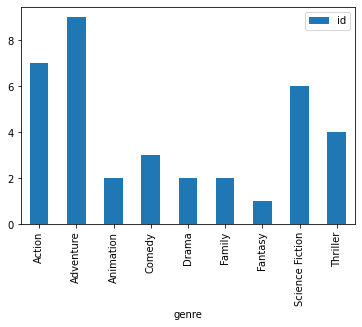

In [20]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

## Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: *Iron Man 1* and *Iron Man 2*. Most of the actors played in both movies. Use an outer join to find actors who **did not** act in both movies.

The *Iron Man 1* table is called `iron_1_actors`, and *Iron Man 2* table is called `iron_2_actors`.

![](https://assets.datacamp.com/production/repositories/5486/datasets/c5d02ebba511e90ae132f89ff091e6729c040bd2/noJoin.png)

In [21]:
iron_1_actors = pd.read_pickle('iron_1_actors.p')
iron_2_actors = pd.read_pickle('iron_2_actors.p')

- Save to `iron_1_and_2` the merge of `iron_1_actors` (left) with `iron_2_actors` tables with an outer join on the id column, and set suffixes to `('_1','_2')`.
- Create an index that returns `True` if `name_1` or `name_2` are *null*, and `False` otherwise.

In [22]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on='id', how='outer', suffixes=['_1', '_2'])

In [23]:
# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | (iron_1_and_2['name_2'].isnull()))

In [24]:
# Print the first few rows of iron_1_and_2
iron_1_and_2[m].head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,War Machine,18288,Terrence Howard,NaN,NaN
5,Raza,57452,Faran Tahir,NaN,NaN
8,Abu Bakaar,173810,Sayed Badreya,NaN,NaN


In [25]:
iron_1_and_2[m].sample(8)

,character_1,id,name_1,character_2,name_2
184,NaN,1265838,NaN,Senator (uncredited),Peter Trenholm Smith
145,NaN,1078574,NaN,Air Force Major (uncredited),Pete Brown
98,NaN,216601,NaN,Security Force #2,Michael Bruno
165,NaN,1200313,NaN,Prison Guard Chevalier (uncredited),Mathew Lorenceau
158,NaN,1265824,NaN,Expo Fan (uncredited),James Granville
116,NaN,1265796,NaN,Hammer Expo Tech,Brian Schaeffer
156,NaN,1265822,NaN,Pepper's Party Guest (uncredited),Shakira Vanise Gamble
82,Reporter (uncredited),1209728,Chris Reid,NaN,NaN


## Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called `crews`, which has columns `id`, `job`, and `name`. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

In [27]:
crews = pd.read_pickle('crews.p')
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


- To a variable called `crews_self_merged`, merge the `crews` table to itself on the `id` column using an inner join, setting the suffixes to `'_dir'` and `'_crew'` for the left and right tables respectively.
- Create a Boolean index, named `boolean_filter`, that selects rows from the left table with the *job* of `'Director'` and avoids rows with the *job* of `'Director'` in the right table.
- Use the `.head()` method to print the first few rows of `direct_crews`.

In [29]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', suffixes=['_dir', '_crew'])

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') 
                  & (crews_self_merged['job_crew'] != 'Director'))

# Print the first few rows of direct_crews
direct_crews = crews_self_merged[boolean_filter]
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


In [33]:
direct_crews.sample(5)

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
569533,17654,Directing,Director,Neill Blomkamp,Camera,Helicopter Camera,Skip Margetts
454204,2649,Directing,Director,David Fincher,Editing,Editor,James Haygood
325312,6947,Directing,Director,M. Night Shyamalan,Editing,Negative Cutter,Mary Beth Smith
834190,25975,Directing,Director,Brett Winn,Production,Executive Producer,Clark Peterson
282705,8656,Directing,Director,Mimi Leder,Crew,Video Assist Operator,Roger Donegan


## How does pandas handle self joins?
Select the **false** statement about merging a table to itself.

1. You can merge a table to itself with a right join.
2. Merging a table to itself can allow you to compare values in a column to other values in the same column.
3. ~The Pandas module limits you to one merge where you merge a table to itself. You cannot repeat this process over and over.~
4. Merging a table to itself is like working with two separate tables.

**Answer: 3**

Pandas treats a merge of a table to itself the same as any other merge. Therefore, it does not limit you from chaining multiple `.merge()` methods together.


## Index merge for movie ratings
To practice merging on indexes, you will merge `movies` and a table called `ratings` that holds info about movie ratings. Make sure your merge returns all of the rows from the `movies` table and not all the rows of `ratings` table need to be included in the result.

In [34]:
ratings = pd.read_pickle('ratings.p')
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


- Merge `movies` and `ratings` on the index and save to a variable called `movies_ratings`, ensuring that all of the rows from the `movies` table are returned.

In [36]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id')

# Print the first few rows of movies_ratings
movies_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


In [37]:
print(movies_ratings.shape)

(4803, 6)


## Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the `sequels` and `financials` tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the `sequels` table and not all the rows of `financials` table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [118]:
sequels = pd.read_pickle('sequels.p')
financials = pd.read_pickle('financials.p')

- With the `sequels` table on the left, merge to it the `financials` table on index named `id`, ensuring that all the rows from the `sequels` are returned and some rows from the other table may not be returned, Save the results to `sequels_fin.

In [119]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')
sequels_fin.head()

,id,title,sequel,budget,revenue
0,19995,Avatar,<NA>,237000000.0,2.787965e+09
1,862,Toy Story,863,30000000.0,3.735540e+08
2,863,Toy Story 2,10193,90000000.0,4.973669e+08
3,597,Titanic,<NA>,200000000.0,1.845034e+09
4,24428,The Avengers,<NA>,220000000.0,1.519558e+09


- Merge the `sequels_fin` table to itself with an inner join, where the left and right tables merge on `sequel` and `id` respectively with suffixes equal to `('_org','_seq')`, saving to `orig_seq`.

In [120]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner',
                             left_on='sequel', right_on='id', 
                             suffixes=['_org', '_seq'])

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

- Select the `title_org`, `title_seq`, and `diff` columns of `orig_seq` and save this as `titles_diff`.
- Sort by `titles_diff` by `diff` in descending order and print the first few rows.

In [121]:
# Select the title_org, title_seq, and diff
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

# Print the first rows of the sorted titles_diff
titles_diff.sort_values('diff', ascending=False).head()

,title_org,title_seq,diff
28,Jurassic Park III,Jurassic World,1.144748e+09
26,Batman Begins,The Dark Knight,6.303398e+08
11,Iron Man 2,Iron Man 3,5.915067e+08
1,Toy Story 2,Toy Story 3,5.696028e+08
14,Quantum of Solace,Skyfall,5.224703e+08


***It is found out that Jurassic World had one of the highest of all, improvement in revenue compared to the original movie.***